In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score,train_test_split
import matplotlib.pyplot as plt
from pykrige.ok import OrdinaryKriging
from pykrige.kriging_tools import write_asc_grid

In [13]:
# data path
data = pd.read_csv("../../datafile/SY_POINT_MERGES.csv")
data

,Unnamed: 0,X,Y,pre_2022_mean_Band_1,tmp_2022_mean_Band_1,SY_ASP_5_Band_1,SY_SLOP_5_Band_1,SY_DEM_5_Band_1,DLMC,PH
0,1,107.140420,28.454940,873.166687,142.083328,311.184540,6.067848,1222.400024,旱地,4.78
1,2,107.004920,28.233230,837.500000,137.250000,41.932869,11.214284,1240.599976,旱地,4.34
2,3,107.427614,28.222543,857.833313,151.166672,325.007690,6.959332,992.099976,水田,5.83
3,4,107.063560,27.856010,807.666687,157.416672,315.000000,3.237762,908.099976,水田,7.30
4,5,107.000850,28.187500,820.416687,151.166672,309.806030,17.349291,992.799988,旱地,4.12
...,...,...,...,...,...,...,...,...,...,...
7487,7489,107.449278,28.010001,849.500000,144.666672,341.567383,5.419226,1078.599976,设施农用�?6.3,NaN
7488,7490,107.452550,28.054348,846.750000,150.166672,121.263115,9.301414,911.599976,旱地,6.90
7489,7491,107.452868,28.070184,843.000000,152.416672,122.242317,21.019365,825.700012,水田,7.03
7490,7492,107.453977,28.088211,848.250000,151.416672,101.886757,5.544981,877.000000,水田,7.25


In [14]:
data.columns

Index(['Unnamed: 0', 'X', 'Y', 'pre_2022_mean_Band_1', 'tmp_2022_mean_Band_1',
       'SY_ASP_5_Band_1', 'SY_SLOP_5_Band_1', 'SY_DEM_5_Band_1', 'DLMC', 'PH'],
      dtype='object')

In [15]:
data.rename(columns={"pre_2022_mean_Band_1":"pre","tmp_2022_mean_Band_1":"tmp","SY_ASP_5_Band_1":"asp","SY_SLOP_5_Band_1":"slope","SY_DEM_5_Band_1":"dem","DLMC":"dl"},inplace=True)
data

,Unnamed: 0,X,Y,pre,tmp,asp,slope,dem,dl,PH
0,1,107.140420,28.454940,873.166687,142.083328,311.184540,6.067848,1222.400024,旱地,4.78
1,2,107.004920,28.233230,837.500000,137.250000,41.932869,11.214284,1240.599976,旱地,4.34
2,3,107.427614,28.222543,857.833313,151.166672,325.007690,6.959332,992.099976,水田,5.83
3,4,107.063560,27.856010,807.666687,157.416672,315.000000,3.237762,908.099976,水田,7.30
4,5,107.000850,28.187500,820.416687,151.166672,309.806030,17.349291,992.799988,旱地,4.12
...,...,...,...,...,...,...,...,...,...,...
7487,7489,107.449278,28.010001,849.500000,144.666672,341.567383,5.419226,1078.599976,设施农用�?6.3,NaN
7488,7490,107.452550,28.054348,846.750000,150.166672,121.263115,9.301414,911.599976,旱地,6.90
7489,7491,107.452868,28.070184,843.000000,152.416672,122.242317,21.019365,825.700012,水田,7.03
7490,7492,107.453977,28.088211,848.250000,151.416672,101.886757,5.544981,877.000000,水田,7.25


In [30]:
# 删除缺失值
# 删除有缺失值的行
data.dropna(inplace=True)
missing_values = data.isnull().sum()
missing_values

Unnamed: 0    0
X             0
Y             0
pre           0
tmp           0
asp           0
slope         0
dem           0
dl            0
PH            0
DLMC          0
dtype: int64

In [31]:
# 划分数据
le =LabelEncoder()
data['dl'] = le.fit_transform(data['dl'])

X = data[['pre','tmp','asp','slope','dem','dl','X','Y']]

y = data['PH']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X,y

(             pre         tmp         asp      slope          dem  dl  \
 0     873.166687  142.083328  311.184540   6.067848  1222.400024  10   
 1     837.500000  137.250000   41.932869  11.214284  1240.599976  10   
 2     857.833313  151.166672  325.007690   6.959332   992.099976  12   
 3     807.666687  157.416672  315.000000   3.237762   908.099976  12   
 4     820.416687  151.166672  309.806030  17.349291   992.799988  10   
 ...          ...         ...         ...        ...          ...  ..   
 7486  848.166687  145.333328  155.450485  12.550745  1072.699951  10   
 7488  846.750000  150.166672  121.263115   9.301414   911.599976  10   
 7489  843.000000  152.416672  122.242317  21.019365   825.700012  12   
 7490  848.250000  151.416672  101.886757   5.544981   877.000000  12   
 7491  840.000000  153.333328  310.913727   8.467508   790.700012  10   
 
                X          Y  
 0     107.140420  28.454940  
 1     107.004920  28.233230  
 2     107.427614  28.222543 

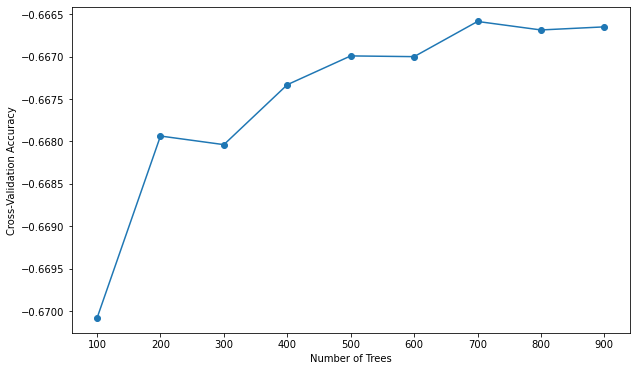

The optimal number of trees is 700


In [16]:
# 设置树的数目范围
n_estimators_range = range(100, 1000, 100)
cv_scores = []

# 使用交叉验证
for n_estimators in n_estimators_range:
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    #scores = cross_val_score(rf, X, y, cv=5, scoring='r2')  # 5折交叉验证
    scores = cross_val_score(rf,X_train, y_train, cv=5, scoring='neg_mean_squared_error')  # 5折交叉验证
    cv_scores.append(scores.mean())

# 绘制交叉验证得分图
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, cv_scores, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Cross-Validation Accuracy')
plt.savefig('target.png')
plt.show()

# 选择最优数量的树
optimal_n_estimators = n_estimators_range[cv_scores.index(max(cv_scores))]
print("The optimal number of trees is {}".format(optimal_n_estimators))

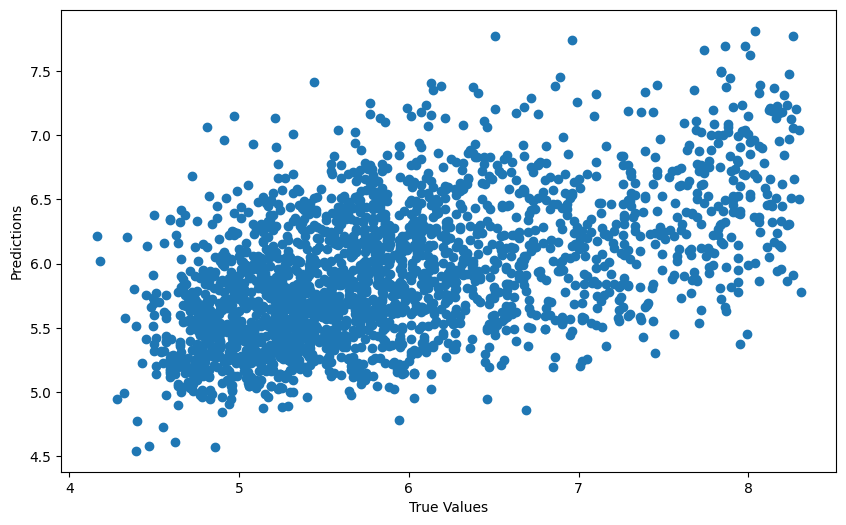

In [32]:
# 初始化和训练随机森林模型
rf = RandomForestRegressor(n_estimators=700, random_state=42)
rf.fit(X_train[['pre','tmp','asp','dem','slope','dl']],y_train)

# 在训练数据上预测，并计算残差
rf_predictions_train = rf.predict(X_train[['pre','tmp','asp','dem','slope','dl']])
residuals_train = y_train - rf_predictions_train

# 初始化和训练克里金模型
OK = OrdinaryKriging(X_train['X'], X_train['Y'], residuals_train, variogram_model='linear')

# 在训练数据上进行预测
rf_predictions_test = rf.predict(X_train[['pre','tmp','asp','dem','slope','dl']])
kriging_predictions_train, _ = OK.execute('points', X_train['X'], X_train['Y'])
predictions_train = rf_predictions_test + kriging_predictions_train

# 计算训练集的RMSE,r2
train_rmse = mean_squared_error(y_train, predictions_train, squared=False)
train_r2 = r2_score(y_train,predictions_train)

# 在测试机上进行预测
rf_predictions_test = rf.predict(X_test[['pre','tmp','asp','dem','slope','dl']])
kriging_predictions_test, _ = OK.execute('points', X_test['X'], X_test['Y'])
predictions_test = rf_predictions_test + kriging_predictions_test

# 计算测试集的RMSE,r2
test_rmse = mean_squared_error(y_test, predictions_test, squared=False)
test_r2 = r2_score(y_test,predictions_test)

# 绘制预测值和真实值的散点图
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_test)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

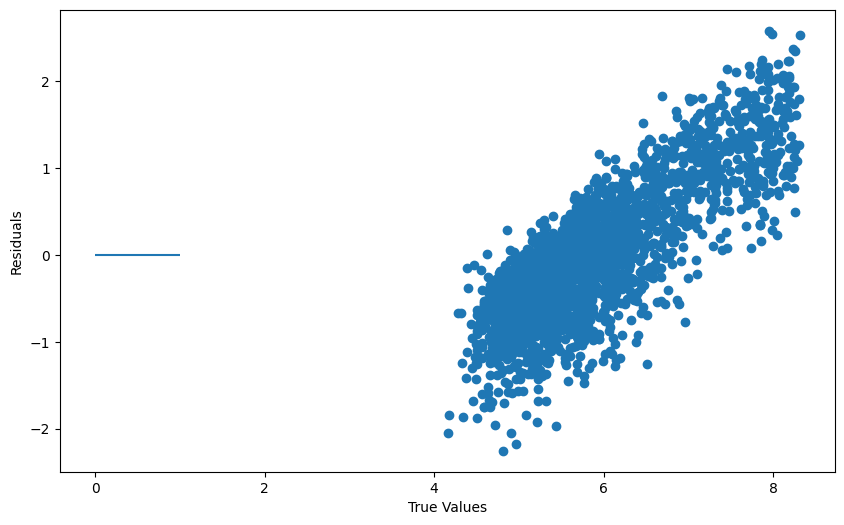

In [33]:
# 绘制测试集的残差图
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test - predictions_test)
plt.hlines(y=0, xmin=0, xmax=1)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.show()

In [36]:
rf.feature_importances_

array([0.18666461, 0.1408724 , 0.14896432, 0.31392112, 0.17360566,
       0.03597189])

Train RMSE: 0.0064
Train R2: 1.0000
Test RMSE: 0.7968
Test R2: 0.2857


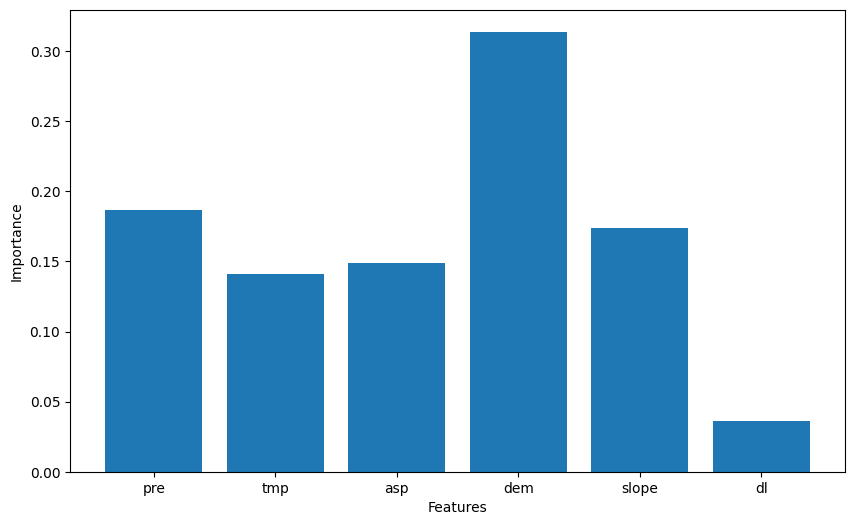

In [37]:
# 打印训练集和测试集的RMSE,r2
print('Train RMSE: %.4f' % train_rmse)
print('Train R2: %.4f' % train_r2)
print('Test RMSE: %.4f' % test_rmse)
print('Test R2: %.4f' % test_r2)
# 绘制特征重要性图
plt.figure(figsize=(10, 6))
plt.bar(['pre','tmp','asp','dem','slope','dl'], rf.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


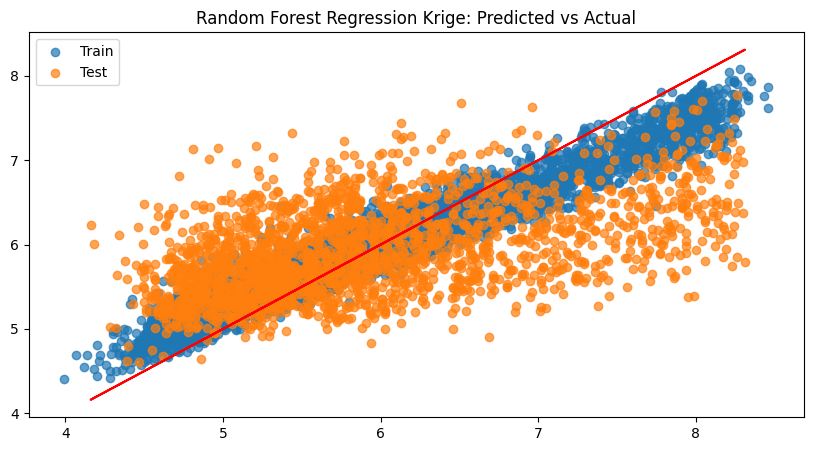

In [40]:
# 在训练集和测试集上的预测值
train_preds = rf.predict(X_train[['pre','tmp','asp','dem','slope','dl']])
test_preds = rf.predict(X_test[['pre','tmp','asp','dem','slope','dl']])


plt.figure(figsize=(10,5))


# 画出训练集的散点图

plt.scatter(y_train, train_preds, label='Train', alpha=.7)

# 画出测试集的散点图

plt.scatter(y_test, test_preds, label='Test', alpha=.7)

# 画出y=x线
plt.plot(y_test, y_test, color='red')



plt.legend()

plt.title('Random Forest Regression Krige: Predicted vs Actual')

plt.show()